# MiTH HACKATHON

<b>Problem Statement: &nbsp; Predicting the sales of products across stores of a retail chain</b><br>
&nbsp; &nbsp;  A large Indian retail chain has stores across 3 states in India: Maharashtra, Telangana and Kerala. These stores stock products across various categories such as FMCG (fast moving consumer goods), eatables / perishables and others. Managing the inventory is crucial for the revenue stream of the retail chain. Meeting the demand is important to not lose potential revenue, while at the same time stocking excessive products could lead to losses.<br> &nbsp; &nbsp; <b>In this hackathon you are tasked with building a machine learning model to predict the sales of products across stores for one month. These models can then be used to power the recommendations for the inventory management software at these stores.<b>

<b>Author:</b> &nbsp;Amogh Babu K A <br>
<b> Batch:</b> &nbsp; BATCH 80 <br>
<b>Host:</b>&nbsp; &nbsp; &nbsp;INSOFE

Importing the Required Basic Libraries

In [1]:
#importing the Basic Libraries
import os
import numpy as np
import pandas as pd
#setting the random seed value
import random
random.seed(123)

In [2]:
#Handling the warnings to ignore them
import warnings
warnings.filterwarnings("ignore")

Read the given Training And Testing Data Set

In [3]:
#importing the train_data 
train_raw = pd.read_csv("../input/train_data.csv", na_values='?')
train_raw.head()

date  product_identifier  department_identifier  \
0  2012-01-01                  74                     11   
1  2012-01-01                 337                     11   
2  2012-01-01                 423                     12   
3  2012-01-01                 432                     12   
4  2012-01-01                 581                     21   

          category_of_product  outlet        state  sales  
0                      others     111  Maharashtra      0  
1                      others     111  Maharashtra      1  
2                      others     111  Maharashtra      0  
3                      others     111  Maharashtra      0  
4  fast_moving_consumer_goods     111  Maharashtra      0

In [4]:
#importing the test_data
test_raw = pd.read_csv("../input/test_data.csv", na_values='?')
test_raw.head()

id        date  product_identifier  department_identifier  \
0   1  2014-03-01                  74                     11   
1   2  2014-03-01                 337                     11   
2   3  2014-03-01                 423                     12   
3   4  2014-03-01                 432                     12   
4   5  2014-03-01                 581                     21   

          category_of_product  outlet        state  
0                      others     111  Maharashtra  
1                      others     111  Maharashtra  
2                      others     111  Maharashtra  
3                      others     111  Maharashtra  
4  fast_moving_consumer_goods     111  Maharashtra

Details and Summary Statistics of the sales Data

In [5]:
print("Train Data Dimentions:",train_raw.shape)
print("Test Data Dimentions:",test_raw.shape)

Train Data Dimentions: (395000, 7)
Test Data Dimentions: (15500, 7)


In [6]:
#Gives the unique Values of the Train Data
train_raw.nunique()

date                     790
product_identifier        50
department_identifier      6
category_of_product        3
outlet                    10
state                      3
sales                    126
dtype: int64

In [7]:
#gives the unique values of the test data
test_raw.nunique()

id                       15500
date                        31
product_identifier          50
department_identifier        6
category_of_product          3
outlet                      10
state                        3
dtype: int64

In [8]:
#statistical Information of the Training Data
train_raw.describe()

product_identifier  department_identifier         outlet          sales
count       395000.000000          395000.000000  395000.000000  395000.000000
mean          1509.960000              24.460000     211.200000       1.228919
std            809.799518               6.337863      91.161291       3.595266
min             74.000000              11.000000     111.000000       0.000000
25%            926.000000              21.000000     113.000000       0.000000
50%           1325.000000              22.000000     221.500000       0.000000
75%           1753.000000              31.000000     331.000000       1.000000
max           3021.000000              33.000000     333.000000     293.000000

In [9]:
#statistical Information of the testing Data
test_raw.describe()

id  product_identifier  department_identifier        outlet
count  15500.000000        15500.000000           15500.000000  15500.000000
mean    7750.500000         1509.960000              24.460000    211.200000
std     4474.608921          809.824616               6.338059     91.164117
min        1.000000           74.000000              11.000000    111.000000
25%     3875.750000          926.000000              21.000000    113.000000
50%     7750.500000         1325.000000              22.000000    221.500000
75%    11625.250000         1753.000000              31.000000    331.000000
max    15500.000000         3021.000000              33.000000    333.000000

In [10]:
#info of Train Data
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395000 entries, 0 to 394999
Data columns (total 7 columns):
date                     395000 non-null object
product_identifier       395000 non-null int64
department_identifier    395000 non-null int64
category_of_product      395000 non-null object
outlet                   395000 non-null int64
state                    395000 non-null object
sales                    395000 non-null int64
dtypes: int64(4), object(3)
memory usage: 21.1+ MB


In [11]:
#info of Test Data
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15500 entries, 0 to 15499
Data columns (total 7 columns):
id                       15500 non-null int64
date                     15500 non-null object
product_identifier       15500 non-null int64
department_identifier    15500 non-null int64
category_of_product      15500 non-null object
outlet                   15500 non-null int64
state                    15500 non-null object
dtypes: int64(4), object(3)
memory usage: 847.8+ KB


In [12]:
print("The datatyes of Train Data:\n",train_raw.dtypes)
print("The datatyes of Train Data:\n",test_raw.dtypes)

The datatyes of Train Data:
 date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
sales                     int64
dtype: object
The datatyes of Train Data:
 id                        int64
date                     object
product_identifier        int64
department_identifier     int64
category_of_product      object
outlet                    int64
state                    object
dtype: object


In [13]:
#Changing the Datatype of DateTime of Both Training Data and Testig Data
train_raw['date'] = pd.to_datetime(train_raw['date'])
test_raw['date'] = pd.to_datetime(test_raw['date'])

In [14]:
print("The datatyes of Train Data:\n",train_raw.dtypes)
print("The datatyes of Train Data:\n",test_raw.dtypes)

The datatyes of Train Data:
 date                     datetime64[ns]
product_identifier                int64
department_identifier             int64
category_of_product              object
outlet                            int64
state                            object
sales                             int64
dtype: object
The datatyes of Train Data:
 id                                int64
date                     datetime64[ns]
product_identifier                int64
department_identifier             int64
category_of_product              object
outlet                            int64
state                            object
dtype: object


## Visulization Process

In [15]:
#Staring the Process with unique values
train_raw['category_of_product'].unique()

array(['others', 'fast_moving_consumer_goods', 'drinks_and_food'],
      dtype=object)

In [16]:
from IPython.display import Image
import itertools
FMCG = train_raw.loc[train_raw['category_of_product'] == 'fast_moving_consumer_goods']
print(FMCG.dtypes)
FMCG['date'].min(), FMCG['date'].max()

date                     datetime64[ns]
product_identifier                int64
department_identifier             int64
category_of_product              object
outlet                            int64
state                            object
sales                             int64
dtype: object


(Timestamp('2012-01-01 00:00:00'), Timestamp('2014-02-28 00:00:00'))

In [17]:
# columns to be removed for visualization 
cols = ['product_identifier', 'department_identifier','category_of_product', 'outlet', 'state']
FMCG = FMCG.drop(cols, axis=1)
FMCG.head()

date  sales
4 2012-01-01      0
5 2012-01-01      0
6 2012-01-01      0
7 2012-01-01      0
8 2012-01-01      0

In [18]:
#Sorting it Based on Date
FMCG = FMCG.sort_values('date')
FMCG.head()

date  sales
4   2012-01-01      0
327 2012-01-01      0
326 2012-01-01      0
325 2012-01-01      0
324 2012-01-01      1

In [19]:
#Grouping it Based on Date and Sales
FMCG = FMCG.groupby('date')['sales'].sum().reset_index()
FMCG.head()

date  sales
0 2012-01-01    144
1 2012-01-02    234
2 2012-01-03    197
3 2012-01-04    190
4 2012-01-05    193

In [20]:
# indexing with the Time Series values
FMCG = FMCG.set_index('date')
FMCG.head()

sales
date             
2012-01-01    144
2012-01-02    234
2012-01-03    197
2012-01-04    190
2012-01-05    193

In [21]:
y = FMCG['sales'].resample('MS').mean()

In [22]:
# Visualizing with the graph
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
plt.show()

<Figure size 1500x600 with 1 Axes>

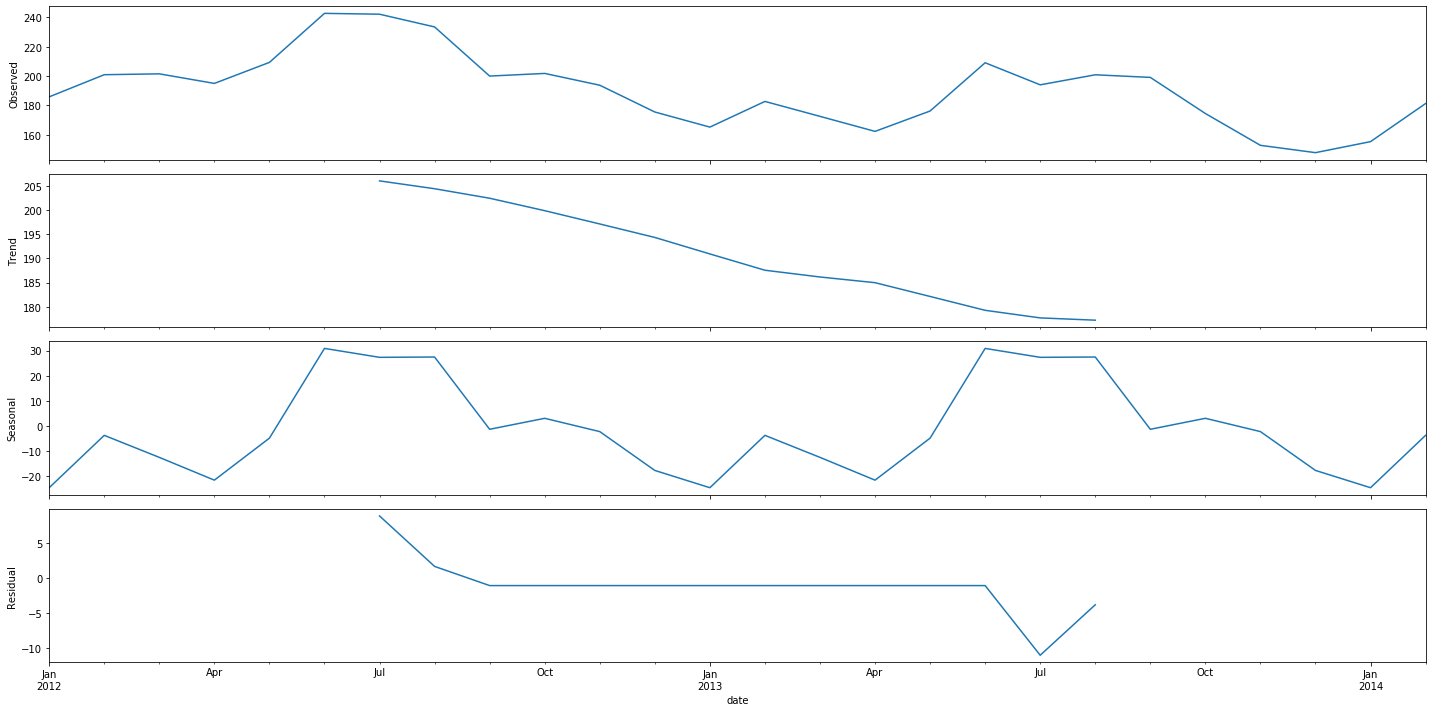

In [23]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 20, 10              #figure Size
decompose = sm.tsa.seasonal_decompose(y, model='additive')  
fig = decompose.plot()
plt.show()

## Model Building Process

In [24]:
x_train = train_raw.iloc[ :-1, :-1].values
y_train = train_raw.iloc[:-1, -1:].values.ravel()

x_test = test_raw.iloc[ :, 1:].values

leng = len(x_train[:])

x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)
temp = np.array(pd.concat([x_train,x_test]))

Encoding the Attributes

In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_x = LabelEncoder()
for i in range(6):
    temp[:,i] = labelencoder_x.fit_transform(temp[:,i])

In [26]:
onehotencoder = OneHotEncoder()
temp = onehotencoder.fit_transform(temp).toarray()

In [27]:
x_train = temp[:leng]
x_test = temp[leng:]

Bulding the Model using RandomForest Regression

In [28]:
from sklearn.ensemble import RandomForestRegressor
classifier = RandomForestRegressor(n_estimators = 100, criterion = "mse", max_features = 'log2',  random_state = 0)

In [30]:
classifier.fit(x_train, y_train)
y_pred_train = classifier.predict(x_train)
temp = []
for i in range(len(y_pred_train)):
    temp.append(int(round(y_pred_train[i])))
y_pred_train = temp

Obtaining the Accuracy score and RMSE

In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from math import sqrt
print("training Model accuracy:",accuracy_score(y_train, y_pred_train))
print("mean squared error:",sqrt(mean_squared_error(y_train,y_pred_train)))

training Model accuracy: 0.7973184742239854
mean squared error: 1.1137065953892982


In [34]:
y_pred_test = classifier.predict(x_test)
temp = []
for i in range(len(y_pred_test)):
    temp.append(int(round(y_pred_test[i])))
y_pred_test = temp

Writing the predicted Output in required format (.csv)

In [35]:
prediction = pd.DataFrame(y_pred_test,columns=['sales'])
id = pd.DataFrame(test_raw['id'],columns=['id'])
pd.concat([id,prediction],axis = 1).to_csv("../output/sales1.csv",index=None)